# Overview of Machine Learning

Machine Learning (ML) is a subfield of Artificial Intelligence that applies math and computation to build models from data. Like modeling tasks in other fields, the goal of machine learning is to cut through the messiness, chaos, and complexity of real-world data to find the underlying relationships in order to represent the system in a meaningful way. All without being explicitly programmed to do so!

ML algorithms use data to learn these representations, and are generally based on statistics and mathematical optimization techniques. The algorithms find patterns, trends, or learn relationships in data that may have gone unnoticed by humans.

There are different types of algorithms available, and which ones to apply will largely depend on the data and the problem at hand. Algorithms are usually grouped by the following type:

- **Supervised learning**: learns patterns from labeled data then applies them to make accurate predictions about new, similar data
- **Unsupervised learning**: gives insight into the structure of the data or reduces the number of variables (or features) to what's relevant
- **Recommender system**: learns relationships within data to make useful recommendations
- **Reinforcement learning**: finds the optimal way to perform a task or learn how to interact in an environment, given a system of rewards and punishments

Machine Learning is closely related to predictive statistics, and is sometimes referred to as predictive analytics or predictive modeling.

In [3]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

## Supervised Learning

Supervised learning is in the realm of building models to make predictions. The data that are fed to the machine learning algorithms include the "answer" or outcome the model needs to predict, which is also called the target variable or labels. The model maps the relationships between the independent variables (the input, or features) and the labels, which is later applied to new, unseen data to make predictions going forward.

Supervised learning is further broken down by the type of problem - there are **classification** problems, which predict a class or category of an observation, and **regression** problems, which predict a numerical value for an observation.

### Classification

Examples of classification algorithms:

- **Logistic Regression**: applies sigmoid function to linear regression, can use either $L_1$ or $L_2$ norm
- **$k$-Nearest Neighbors (kNN)**: finds $k$-nearest neighbors based on a similarity function and uses majority vote to determine the class
- **Random forest classifier**:
- **Stochastic Gradient Descent classifier**: capable of handling large datasets and training in batches (or each instance independently)

#### Performance Measures

Performance measures tie closely to the confusion matrix, which shows a grid of actual labels against predicted results.

| Actual: | Predicted False | Predicted True |
| ----- | ----- | ----- |
| **Is False** | TN | FP |
| **Is True** | FN | TP |


A **type I error** (false negative) is when the label is true but the observation is incorrectly classified as false. The probability of a type I error is called **alpha risk**. A **type II error** (false positive) is when the label is false but the observation is incorrectly classified as true. The probability of a type II error is called **beta risk**.

- **Accuracy**: the fraction of correct predictions to total predictions $\frac{TN + TP}{TN + FN + TP + FP}$
- **Precision**: the rate of true positives to everything predicted as positive. In other words, when the model claims an observation is positive, it's correct this percent of the time. Good metric to use when what is classified as positive MUST be correct (predicting appropriate videos for kids) $\frac{TP}{TP + FP}$
- **Recall (sensitivity, true positive rate)**: the rate of true positives to everything that is postitive, or in other words, the percent of all the positives the model detects. Good metric to use when you can't let any positives slip through the cracks (predicting malignant tumors so patient receives timely treatment) $\frac{TP}{TP + FN}$
- **F1 Score**: the harmonic mean of precision and recall - the highest value (1) is only possible when both values for precision and recall are high. Good for situations that don't favor either precision or recall, but want to maximize both, or for when the positive class is scarce $\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}}$
- **Specificity (true negative rate)**: the rate of true negatives to everything that is negative $\frac{TN}{TN + FP}$
- **False positive rate**: rate of negative values falsely classified as positive to everything that is negative $\frac{FP}{TN + FP}$
- **False negative rate**: rate of positive values falsely classified as negative to everything that is  positive $\frac{FN}{TP + FN}$
- **Receiver Operating Characteristic (ROC)**: plots the FPR (incorrectly classified negative values to all negative values) against the TPR/recall/sensitivity (correctly classified positive values to all positive values). As the threshold shifts (to left) to increase the TPR, it incorrectly classifies more and more negative values as positive and vice versa. The total **area under the ROC curve (AUROC)** is 1, indicating a perfect classifier (0.5 is completely random). Similar to precision-recall and F1 - use that when the positive class is scarce or when you care more about the false positives than the false negatives, use ROC otherwise.

In [83]:
# Import toy wine dataset from scikit learn
# Analysis meant as demonstration of performance measures only - no EDA, data cleaning,
#    or model tuning has been performed
import sklearn.datasets

# Import model
from sklearn.ensemble import RandomForestClassifier

# Import scikit learn metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [27]:
wine = sklearn.datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [16]:
# Create DataFrame to lightly explore data
# wdf = pd.DataFrame(wine['data'], columns=wine['feature_names'])
# wdf.head()

In [28]:
X = wine['data']

# Convert labels to binary classification problem
#    postive: class_0, negative: class_1 or class_2)
y = (wine['target'] == 0).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [59]:
# Create and fit a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
# Create a confusion matrix - predictions vs labels
y_train_pred_rf = cross_val_predict(rf, X_train, y_train, cv=3)

cm_rf = confusion_matrix(y_train, y_train_pred)
cm_rf

array([[93,  2],
       [ 3, 44]])

In [62]:
# Precision: what percent of the positive preditions were correct?
p = precision_score(y_train, y_train_pred_rf)

# Recall: how many positive labels were correctly classified
r = recall_score(y_train, y_train_pred_rf)

# F1: similar precision and recall
f_1 = f1_score(y_train, y_train_pred_rf)

print('Precision: {0:.4f}'.format(p))
print('Recall/Sensitivity/TPR: {0:.4f}'.format(r))
print('F1 score: {0:.4f}'.format(f_1))

Precision: 0.9778
Recall/Sensitivity/TPR: 0.9362
F1 score: 0.9565


In [81]:
# Check different score types across 3-fold cross validation
score_types = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for score in score_types:
    vals = cross_val_score(rf, X_train, y_train, cv=3, scoring=score)
    print('Method: {}'.format(score))
    print('Results: {}'.format(vals))


Method: accuracy
Results: [0.9375     1.         0.97826087]
Method: precision
Results: [1.     1.     0.9375]
Method: recall
Results: [0.8125 1.     1.    ]
Method: f1
Results: [0.89655172 1.         0.96774194]
Method: roc_auc
Results: [1. 1. 1.]


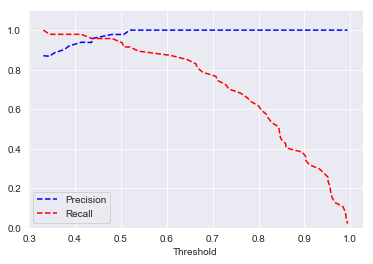

In [82]:
# Generate RandomForestClassifier scores to plot P-R and ROC
# cross_val_predict returns an array with probabilities for negative and positive classes
y_scores_rf = cross_val_predict(rf, X_train, y_train, cv=3, method='predict_proba')

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:, 1])

# Plot precision and recall values against thresholds
plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "r--", label="Recall")
plt.legend()
plt.ylim([0, 1.1])
# plt.margins(0.2)
plt.xlabel("Threshold")
plt.show()

Area under the ROC curve: 0.9973


Text(0.5, 1.0, 'Random Forest ROC Curve')

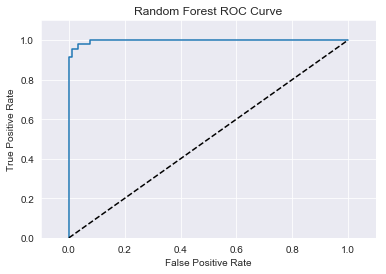

In [78]:
# ROC Curve
fpr_rf, tpr_rf, thresholds_roc_rf = roc_curve(y_train, y_scores_rf[:, 1])
auc_rf = roc_auc_score(y_train, y_scores_rf[:, 1])

print('Area under the ROC curve: {0:.4f}'.format(auc_rf))

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([-0.1, 1.1, 0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")

### Regression

[TO COME]